In [333]:
import pandas as pd

In [334]:
import numpy as np

In [335]:
import matplotlib.pyplot as plt

In [336]:
import seaborn as sns

In [337]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [338]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


There are 21 columns. The last column is our target attribute. It is a categorical variable. Hence we have to use classification algorithm. Also as can be seen, customer id is just a random variable and has no effect on churn .

In [339]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


THere are three columns which are having numeric data

# Visualizing data

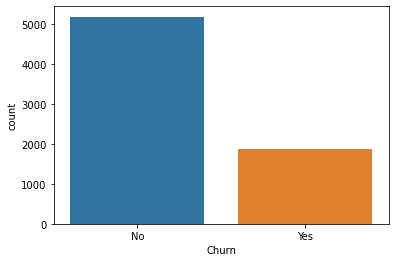

In [341]:
sns.countplot(df['Churn'])

We see a data imbalance in target attribute

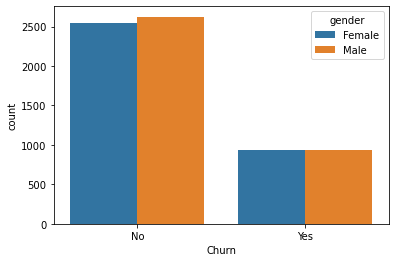

In [342]:
sns.countplot(x='Churn',data=df,hue='gender')

People of both the genders have churned and not churned equally. Hence no effect is seen of gender on whether curning or not churning

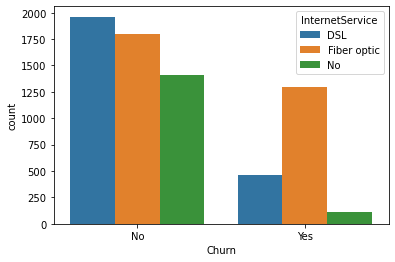

In [343]:
sns.countplot(x='Churn',data=df,hue='InternetService')

People with fibre optic internetservice has higher churning rate.

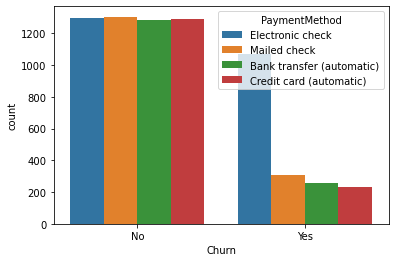

In [344]:
sns.countplot(x='Churn',data=df,hue='PaymentMethod')

The payment method of electronic check have more churning rate

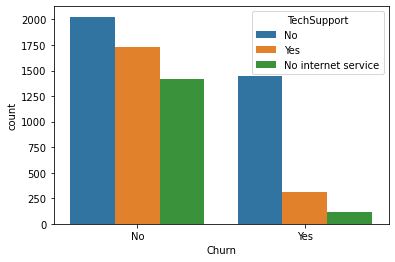

In [345]:
sns.countplot(x='Churn',data=df,hue='TechSupport')

Where tech support is not there, churning rate is high

Removing unwanted column from dataset

In [346]:
df.drop(['customerID'],axis=1,inplace=True)

In [347]:
df.drop(['gender'],axis=1,inplace=True)

In [348]:
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null data in the dataset

# Encoding the data that is not in numerical form

In [349]:
from sklearn.preprocessing import LabelEncoder

In [350]:
le=LabelEncoder()

In [351]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [353]:
df['Partner']=le.fit_transform(df['Partner'])

In [354]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [355]:
df['PhoneService']=le.fit_transform(df['PhoneService'])

In [356]:
df['MultipleLines']=le.fit_transform(df['MultipleLines'])

In [357]:
df['InternetService']=le.fit_transform(df['InternetService'])

In [358]:
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])

In [359]:
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])

In [360]:
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])

In [361]:
df['TechSupport']=le.fit_transform(df['TechSupport'])

In [362]:
df['StreamingTV']=le.fit_transform(df['StreamingTV'])

In [363]:
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])

In [364]:
df['Contract']=le.fit_transform(df['Contract'])

In [365]:
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])

In [366]:
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])

In [367]:
df['Churn']=le.fit_transform(df['Churn'])

In [368]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


Total Charges column is having object datatype whereas in actual it is float. converting it into float datatype

In [369]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [370]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
1391.15     1
4481        1
1555.65     1
4839.15     1
75.7        1
Name: TotalCharges, Length: 6531, dtype: int64

In [371]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [372]:
df.dtypes

SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [373]:
df['TotalCharges']=df['TotalCharges'].replace(np.NaN,df['TotalCharges'].mean())

# Scaling the data set

In [374]:
from sklearn.preprocessing import MinMaxScaler

In [375]:
dx=df.drop(['Churn'],axis=1)

In [376]:
mms=MinMaxScaler()

In [377]:
x=mms.fit_transform(dx)

In [378]:
x=pd.DataFrame(x)

In [379]:
x.shape

(7043, 18)

In [380]:
y=df['Churn']

In [381]:
y.shape

(7043,)

In [382]:
from sklearn.model_selection import train_test_split

In [383]:
from sklearn.metrics import accuracy_score

In [384]:
from sklearn.ensemble import RandomForestClassifier

In [385]:
from sklearn.linear_model import LogisticRegression

In [386]:
from sklearn.tree import DecisionTreeClassifier

In [387]:
from sklearn.svm import SVC

In [388]:
maxAcc=0
maxRS=0

In [431]:
for i in range(1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred_dtc=DTC.predict(x_test)
    acc_dtc=accuracy_score(y_test,pred_dtc)
    if acc_dtc>maxAcc:
        maxAcc=acc_dtc
        maxRS=i
print('Best Accuracy is',maxAcc,'on random state',maxRS)

Best Accuracy is 0.7586370089919545 on random state 386


In [473]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=386)

In [474]:
LR=LogisticRegression()

In [475]:
LR.fit(x_train,y_train)

LogisticRegression()

In [476]:
pred_lr=LR.predict(x_test)

In [477]:
acc_lr=accuracy_score(y_test,pred_lr)

In [478]:
print(acc_lr)

0.8064363464268812


In [479]:
SV=SVC()

In [480]:
SV.fit(x_train,y_train)

SVC()

In [481]:
pred_svc=SV.predict(x_test)

In [482]:
acc_sv=accuracy_score(y_test,pred_svc)

In [483]:
print(acc_sv)

0.7917652626597255


In [484]:
RFC=RandomForestClassifier()

In [485]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [486]:
pred_rf=RFC.predict(x_test)

In [487]:
acc_rf=accuracy_score(y_test,pred_rf)

In [488]:
print(acc_rf)

0.7936583057264552


In [489]:
from sklearn.model_selection import cross_val_score

In [490]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.8026417026904962


In [491]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.7969629088973482


In [492]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.7881606272985354


In [493]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.728523715239693


Logistc Regression is best model based on accuracy score and cross validation score

In [494]:
from sklearn.model_selection import GridSearchCV


In [495]:
parameter={'dual':[False],'fit_intercept':[True,False],'warm_start':[True,False],'multi_class':['auto','ovr','multinomial']}


In [496]:
GCV=GridSearchCV(LogisticRegression(),parameter,cv=5)


In [497]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'dual': [False], 'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'warm_start': [True, False]})

In [498]:
GCV.best_params_


{'dual': False,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'warm_start': True}

In [514]:
Finalmod=LogisticRegression(dual=False,fit_intercept=True,multi_class='multinomial',warm_start=True)


In [515]:
Finalmod.fit(x_train,y_train)
pred_fin=Finalmod.predict(x_test)
acc_fin=accuracy_score(y_test,pred_fin)
print(acc_fin*100)

80.54898248935163


In [516]:
from sklearn.metrics import roc_curve


In [517]:
from sklearn.metrics import roc_auc_score


In [518]:
LR=LogisticRegression()

In [519]:
LR.fit(x_train,y_train)


LogisticRegression()

In [520]:
y_pred_prob=LR.predict_proba(x_test)[:,1]


In [521]:
y_pred_prob

array([0.63585092, 0.00979052, 0.0055648 , ..., 0.04363601, 0.13135066,
       0.5735421 ])

In [522]:
y_pred_prob.shape


(2113,)

In [523]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)


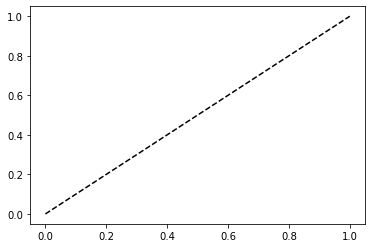

In [524]:
plt.plot([0,1],[0,1],'k--')


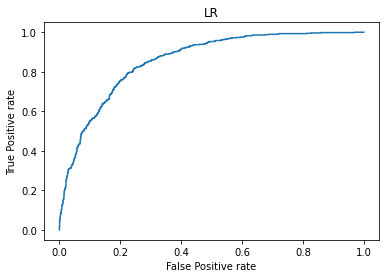

In [525]:
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('LR')
plt.show()

In [526]:
auc_score=roc_auc_score(y_test,LR.predict(x_test))


In [527]:
auc_score


0.718885429949674

In [528]:
import joblib


In [529]:
joblib.dump(Finalmod,'Churnanalysis.pkl')


['Churnanalysis.pkl']